In [1]:
import catalogue_analysis as ca
import numpy as np
from astropy.table import join,Table,Column,vstack
from astropy.io import fits
#
# Specify regions to loop over
regions=('S','N')
#
# Read the enhanced BGS catalogue produced by Augment_BGS_cat.ipynb
dat=Table.read('BGS_Y3_A1.fits')
print('Meta data stored with ths table:')
print(dat.meta)
#
# Check selection cuts agree with stored meta data of the sample we have read
Sel=ca.selection('S')
assert dat.meta['FAINT_S'] == Sel['faint'], f"Faint limits do not match: {dat.meta['FAINT_S']} != {Sel['faint']}"
assert dat.meta['BRIGHT_S'] == Sel['bright'], f"Bright limits do not match: {dat.meta['BRIGHT_S']} != {Sel['bright']}"
assert dat.meta['ZMAX_S'] == Sel['zmax'], f"Zmax do not match: {dat.meta['ZMAX_S']} != {Sel['zmax']}"
assert dat.meta['ZMIN_S'] == Sel['zmin'], f"Zmin do not match: {dat.meta['ZMIN_S']} != {Sel['zmin']}"
assert dat.meta['QEVOL_S'] == Sel['Qevol'], f"Qevol do not match: {dat.meta['QEVOL_S']} != {Sel['Qevol']}"
assert dat.meta['AREA_S'] == Sel['area'], f"Areas do not match: {dat.meta['AREA_S']} != {Sel['area']}"
assert dat.meta['F_RAN_S'] == Sel['f_ran'], f"f_ran do not match: {dat.meta['F_RAN_S']} != {Sel['f_ran']}"
assert dat.meta['COL_S'] == Sel['col'], f"Colours do not match: {dat.meta['COL_S']} != {Sel['col']}"
assert dat.meta['STYLE_S'] == Sel['style'], f"Styles do not match: {dat.meta['STYLE_S']} != {Sel['style']}"
Sel=ca.selection('N')
assert dat.meta['FAINT_N'] == Sel['faint'], f"Faint limits do not match: {dat.meta['FAINT_N']} != {Sel['faint']}"
assert dat.meta['BRIGHT_N'] == Sel['bright'], f"Bright limits do not match: {dat.meta['BRIGHT_N']} != {Sel['bright']}"
assert dat.meta['ZMAX_N'] == Sel['zmax'], f"Zmax do not match: {dat.meta['ZMAX_N']} != {Sel['zmax']}"
assert dat.meta['ZMIN_N'] == Sel['zmin'], f"Zmin do not match: {dat.meta['ZMIN_N']} != {Sel['zmin']}"
assert dat.meta['QEVOL_N'] == Sel['Qevol'], f"Qevol do not match: {dat.meta['QEVOL_N']} != {Sel['Qevol']}"
assert dat.meta['AREA_N'] == Sel['area'], f"Areas do not match: {dat.meta['AREA_N']} != {Sel['area']}"
assert dat.meta['F_RAN_N'] == Sel['f_ran'], f"f_ran do not match: {dat.meta['F_RAN_N']} != {Sel['f_ran']}"
assert dat.meta['COL_N'] == Sel['col'], f"Colours do not match: {dat.meta['COL_N']} != {Sel['col']}"
assert dat.meta['STYLE_N'] == Sel['style'], f"Styles do not match: {dat.meta['STYLE_N']} != {Sel['style']}"

# Check cosmology used matches with that used to create the catalogue
assert dat.meta['OM0'] == ca.cosmo.Om0, f"Omega_0 does not match: {dat.meta['OM0']} != {ca.cosmo.Om0}"
assert dat.meta['H0'] == ca.cosmo.H0.value, f"H_0 does not match: {dat.meta['H0']} != {ca.cosmo.H0.value}"
assert dat.meta['TCMB0'] == ca.cosmo.Tcmb0.value, f"Omega_0 does not match: {dat.meta['OM0']} != {ca.cosmo.Tcmb0.value}"

print('Statistics of the data in the table:')
dat.info('stats')

Meta data stored with ths table:
OrderedDict([('EXTNAME', 'LSS'), ('QEVOL_N', 0.78), ('ZMAX_N', 0.6), ('ZMIN_N', 0.002), ('BRIGHT_N', 10.0), ('FAINT_N', 19.54), ('AREA_N', 0.09278121822233744), ('F_RAN_N', 1.0), ('COL_N', 'blue'), ('STYLE_N', 'dashed'), ('QEVOL_S', 0.78), ('ZMAX_S', 0.6), ('ZMIN_S', 0.002), ('BRIGHT_S', 10.0), ('FAINT_S', 19.5), ('AREA_S', 0.2067143725378028), ('F_RAN_S', 1.0), ('COL_S', 'red'), ('STYLE_S', 'solid'), ('H0', 100.0), ('TCMB0', 2.725), ('OM0', 0.313)])
Statistics of the data in the table:
<Table length=7845183>
       name            mean         std         min          max    
------------------ ------------ ----------- ------------ -----------
          TARGETID  3.96297e+16 2.48551e+12  3.96273e+16 3.96374e+16
                 Z     0.213358    0.104274   0.00200098     0.59999
             NTILE      2.42942    0.916613            1           5
                RA      183.119     91.3102  0.000108207         360
               DEC      21.9893     23

In [3]:
# Read one the corresponding Y3 random (It is matched to the orginal clustering catalogue and not yet the cuts made our sample
fpath='/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/test/nonKP/BGS_BRIGHT_7_clustering.ran.fits'
ranfull=ca.Y3load_catalogues(fpath)
ranfull.info('stats')

#Random sample and apply all cuts from the start for a quick run through
Sel=ca.selection('N')# import North selection cuts  
smaskN= (ranfull['Z'] > Sel['zmin']) & (ranfull['Z'] < Sel['zmax']) & (np.random.rand(ranfull['Z'].size)<Sel['f_ran'])\
      & (ranfull['rmag'] < Sel['faint'])  & (ranfull['rmag'] > Sel['bright']) & (ranfull['reg']=='N') 
Sel=ca.selection('S') # import South selection cuts    
smaskS= (ranfull['Z'] > Sel['zmin']) & (ranfull['Z'] < Sel['zmax']) &(np.random.rand(ranfull['Z'].size)<Sel['f_ran']) \
      & (ranfull['rmag'] < Sel['faint'])  & (ranfull['rmag'] > Sel['bright']) & (ranfull['reg']=='S')
smask= np.logical_or(smaskN,smaskS) #True for objects making cuts in North or South
ran=ranfull[smask]    
print('South sample size:',smaskS.sum())
print('North sample size:',smaskN.sum())
ran.info('stats')


<Table length=30890761>
      name           mean        std         min         max    
---------------- ----------- ----------- ----------- -----------
        TARGETID  3.2786e+17 2.48765e+12 3.27858e+17 3.27868e+17
              RA     182.362     93.1026 1.44426e-05         360
             DEC     22.0439     23.2156    -19.5674     79.2522
           NTILE     2.24559    0.944439           1           5
         PHOTSYS          --          --          --          --
FRAC_TLOBS_TILES    0.977861   0.0316573           0           1
               Z    0.213384    0.104274  0.00200098     0.59999
          WEIGHT     1.26497    0.755124           0     68.9124
      WEIGHT_SYS           1           0           1           1
     WEIGHT_COMP     1.29179    0.769686           1          69
    WEIGHT_ZFAIL     1.00127  0.00520768           1     1.19818
   TARGETID_DATA 3.96297e+16 2.48594e+12 3.96273e+16 3.96374e+16
    flux_g_dered     26.5728     94.3445    -72.8934     9805.88
 

In [4]:
# Set up jackknife region limits to equally split up the randoms provided
# and assign unique indices to each region for both data and randoms
njack_S=0
dat['ijack']=-999  # default to mean unassigned
ran['ijack']=-999  # default to mean unassigned
for reg in regions:
    regmask = (dat['reg']==reg)   
    ranregmask = (ran['reg']==reg)  
    print('Processing region ',reg)
    if (reg=='S'):
      # set up the RA and dec boundaries  
      njack_S,limits_S=ca.solve_jackknife_nonsq(ran[ranregmask], ndiv_ra=4, ndiv_dec=5, offset=275)
      # assign randoms to regions
      ca.set_jackknife(ran, ranregmask, limits_S, 0, njack_S)
      # assign data to the same regions
      ca.set_jackknife(dat, regmask, limits_S, 0, njack_S)
    else: 
      # set up the RA and dec boundaries   
      njack_N,limits_N=ca.solve_jackknife_nonsq(ran[ranregmask], ndiv_ra=3, ndiv_dec=3, offset=275)
      # assign randoms to regions
      ca.set_jackknife(ran, ranregmask, limits_N, njack_S, njack_N)
      # assign data to the same regions  
      ca.set_jackknife(dat, regmask, limits_N, njack_S, njack_N)
    

Processing region  S
length of data table: 21321530
assigning 1066077 objects to jackknife region 0
assigning 1066076 objects to jackknife region 1
assigning 1066077 objects to jackknife region 2
assigning 1066076 objects to jackknife region 3
assigning 1066077 objects to jackknife region 4
assigning 1066077 objects to jackknife region 5
assigning 1066076 objects to jackknife region 6
assigning 1066076 objects to jackknife region 7
assigning 1066076 objects to jackknife region 8
assigning 1066077 objects to jackknife region 9
assigning 1066077 objects to jackknife region 10
assigning 1066076 objects to jackknife region 11
assigning 1066076 objects to jackknife region 12
assigning 1066076 objects to jackknife region 13
assigning 1066077 objects to jackknife region 14
assigning 1066077 objects to jackknife region 15
assigning 1066075 objects to jackknife region 16
assigning 1066077 objects to jackknife region 17
assigning 1066076 objects to jackknife region 18
assigning 1066077 objects t

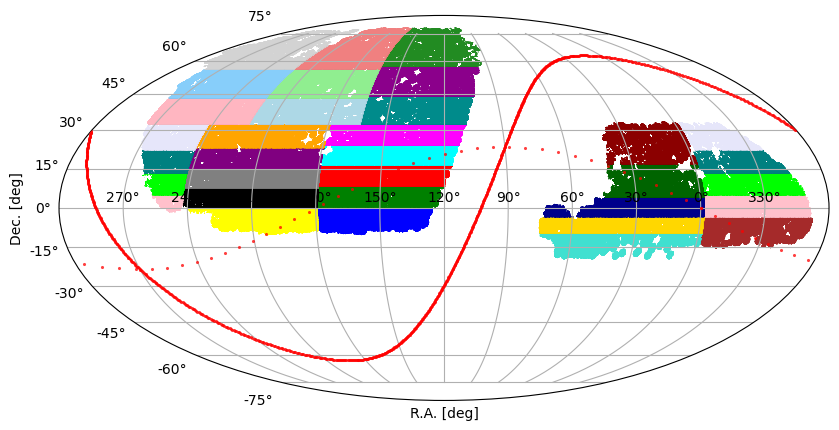

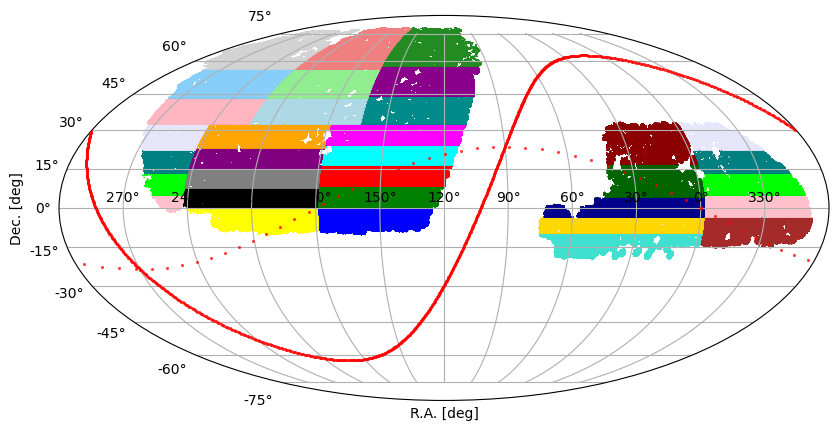

In [5]:
# Visualise the jackknife regions 'Black crosses indicate any unassigned objects'
ca.sky_plot_jack(dat)
ca.sky_plot_jack(ran)

In [9]:
# Form a redshift subsample defined by zmin_sub and zmax_sub and defined adjusted vmax values vmax_sub
zmin_sub=0.05
zmax_sub=0.15
datsub=ca.redshift_slice(dat,zmin_sub,zmax_sub)

datsub.info('stats')        

<Table length=2090186>
       name            mean         std         min          max    
------------------ ------------ ----------- ------------ -----------
          TARGETID  3.96296e+16 2.47559e+12  3.96273e+16 3.96373e+16
                 Z     0.106243   0.0278436    0.0500004        0.15
             NTILE      2.43164    0.914599            1           5
                RA      183.158     90.5264   0.00063123         360
               DEC       21.875     23.0642     -19.5147     79.1648
           PHOTSYS           --          --           --          --
  FRAC_TLOBS_TILES     0.983988   0.0272373     0.333333           1
      WEIGHT_ZFAIL      1.00135   0.0057667            1     1.19818
        WEIGHT_FKP   0.00646387  0.00193786   0.00342694  0.00942704
        BITWEIGHTS -7.04535e+13 3.04567e+18 -9.22337e+18 9.22337e+18
          PROB_OBS     0.852341    0.211493            0           1
            WEIGHT      1.31944     0.80258            1     25.0392
       WEIG

jackknife index range: 0 19
number of jackknife samples: 20  for region: S
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


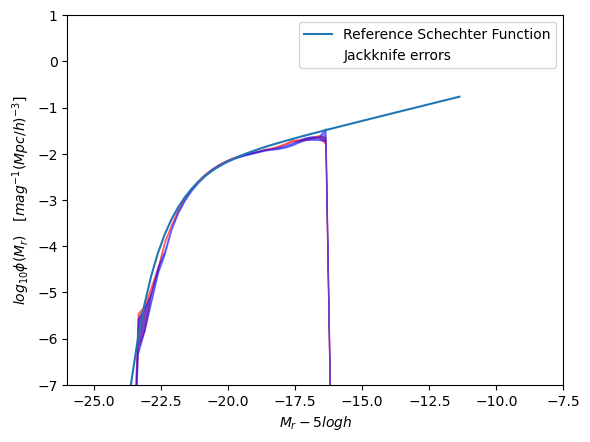

jackknife index range: 0 19
number of jackknife samples: 20  for region: S
jackknife index range: 20 28
number of jackknife samples: 9  for region: N


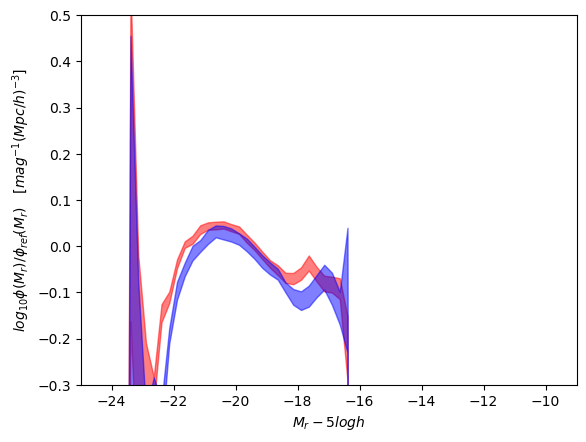

In [10]:
#1/Vmax LF estimate
log_phi_vmax,log_phi_low,log_phi_hi,magbins=ca.lumfun_vmax(datsub,regions,ratio=False)
#1/Vmax LF estimate
log_phi_vmax,log_phi_low,log_phi_hi,magbins=ca.lumfun_vmax(datsub,regions,ratio=True)

bin width 0.25
Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_S_rband_z01.dat
number in full sample: 1453541
region: S : luminosity density correction factor: 0.98496691685596
region: S : luminosity density correction factor: 1.0002396167642729
region: S : luminosity density correction factor: 0.9999977780311745
region: S : luminosity density correction factor: 0.9999892529561777
region: S : luminosity density correction factor: 0.9999953724537385
converged after 4  iterations or reached maximum 12
Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_N_rband_z01.dat
number in full sample: 636645
region: N : luminosity density correction factor: 1.0042543769211763
region: N : luminosity density correction factor: 1.0003782453287549
region: N : luminosity density correction factor: 1.0000148623200167
region: N : luminosity density correction factor: 0.9999924620654441
region: N : luminosity density correction facto

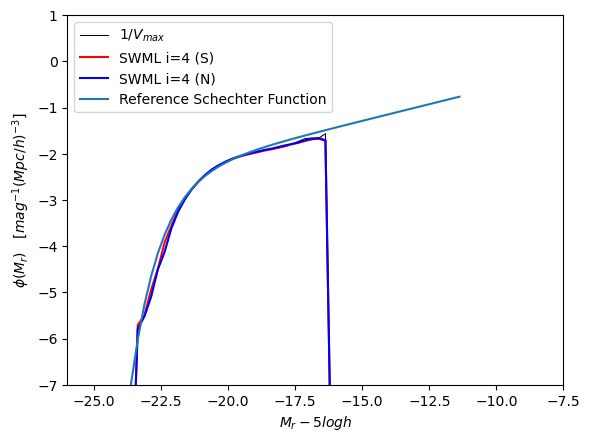

In [11]:
#SWML LF estimate normalized to that of the initial guess
log_phi_swml,magbins=ca.lumfun_swml(datsub,regions,log_phi_vmax,magbins)